In [1]:
import tensorflow as tf
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass
print(tf.config.get_visible_devices())

import numpy as np
import pandas as pd
from data.custom_scalerTF import custom_scalerTF
import matplotlib as mpl
import matplotlib.pyplot as plt

cs = custom_scalerTF()

X = np.load("data/raw/X.npy")[:1000000]
df = pd.DataFrame(dict(zip(['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'phih'], X.T)))

Y = cs.inverse_transform(cs.transform(X)).numpy()

for i in range(100):
    Y = cs.inverse_transform(cs.transform(Y)).numpy()

df2 = pd.DataFrame(dict(zip(['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'phih'], Y.T)))



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2021-11-19 16:00:49.161281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = tf.keras.activations.tanh(tf.random.normal([10000000,7], 0, 5))

invtran = cs.inverse_transform(x)
tran    = cs.inverse_transform(x)
print(np.isnan(invtran.numpy()).any(), np.isnan(tran.numpy()).any())

False False


In [3]:
df2.describe()

,Q2,W,Gamnu,Xbj,y,t,phih
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,6.006887,67.719879,2453.001221,0.001333,0.836962,0.193268,181.689484
std,2.449457,3.491658,231.701447,0.000684,0.079056,0.264329,133.337906
min,4.000002,19.083599,197.295761,0.000808,0.067317,0.001000,0.000000
25%,4.456722,67.107506,2402.653015,0.000956,0.819783,0.006015,43.710117
50%,5.181522,68.928371,2534.399902,0.001128,0.864735,0.038297,185.364807
75%,6.649357,69.793350,2598.263184,0.001468,0.886525,0.371611,317.694977
max,61.168091,70.334106,2637.756592,0.048344,0.900000,1.000995,360.000000


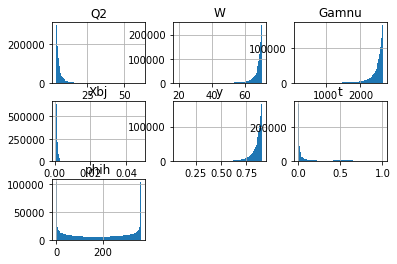

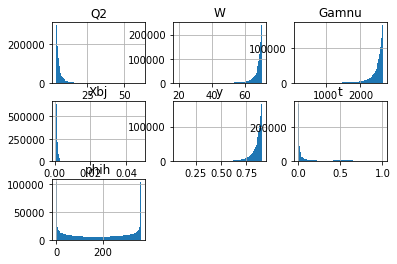

In [4]:
df.hist(bins=100)
df2.hist(bins=100);


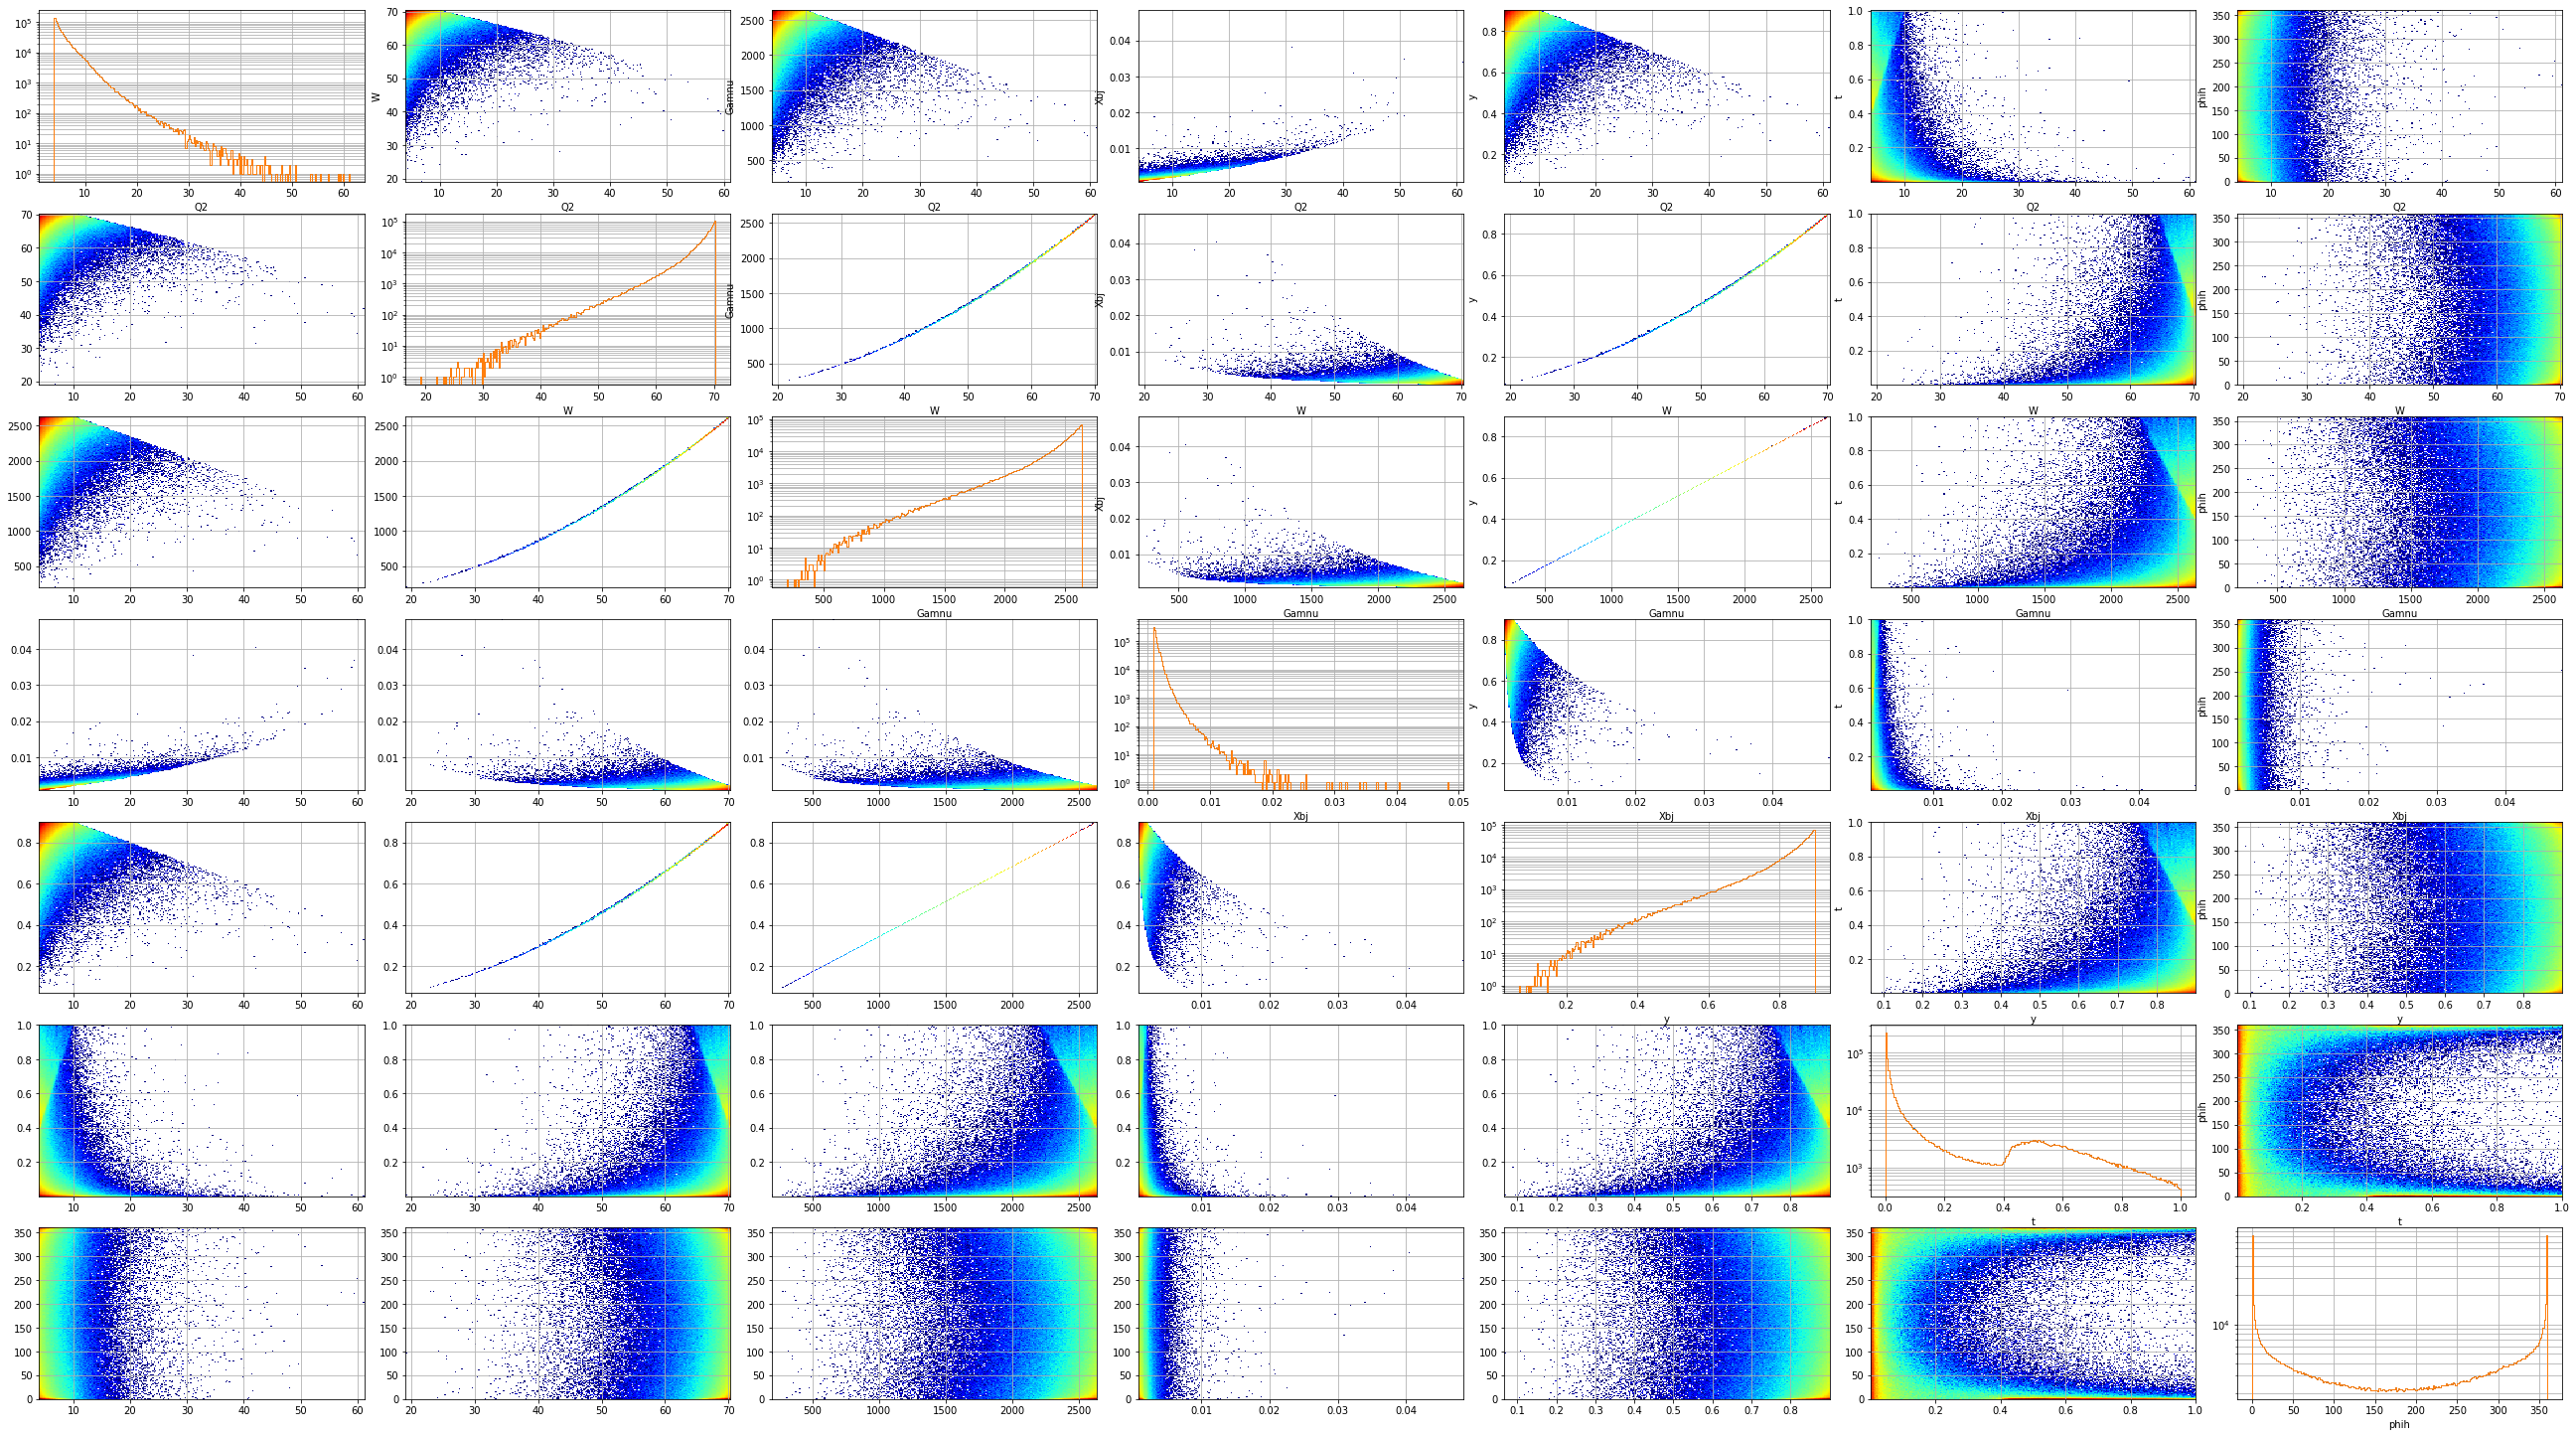

In [5]:
f, axs = plt.subplots(7,7, figsize=(36,20)); f.tight_layout()
nns = ["Q2", "W", "Gamnu", "Xbj", "y", "t", "phih"]
for i, ni in enumerate(nns):
    for j, nj in enumerate(nns):
        if i == j:
            bins = np.linspace(np.min(np.r_[X[:,i], Y[:,i]]), np.max(np.r_[X[:,i],Y[:,i]]), 250+1)
            axs[i,j].hist(X[:,i], histtype='step', bins=bins)
            axs[i,j].hist(Y[:,i], histtype='step', bins=bins)
            axs[i,j].set_xlabel(ni)
            axs[i,j].set_yscale('log')
            axs[i,j].grid(which='both')
        elif j > i:
            binsx = np.linspace(np.min(np.r_[X[:,i], Y[:,i]]), np.max(np.r_[X[:,i],Y[:,i]]), 250+1)
            binsy = np.linspace(np.min(np.r_[X[:,j], Y[:,j]]), np.max(np.r_[X[:,j],Y[:,j]]), 250+1)
            axs[i,j].hist2d(Y[:,i],Y[:,j], bins=[binsx,binsy], cmap="jet", norm=mpl.colors.LogNorm())
            axs[j,i].hist2d(X[:,i],X[:,j], bins=[binsx,binsy], cmap="jet", norm=mpl.colors.LogNorm())
            axs[i,j].set_xlabel(ni)
            axs[i,j].set_ylabel(nj)
            axs[i,j].grid(which='both')
            axs[j,i].grid(which='both')
